# Amazon Fine Food Reviews: EDA

# Sprint-2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [3]:
df=pd.read_csv("Amazon_review.csv")

In [3]:
df.head()

,Unnamed: 0,ProductId,UserId,Time,profile_Name,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Review_summary,Review_Text,Rating,sentiment
0,0,B00813GRG4,A1D87F6ZCVE5NK,05:30:00,dll pa,0.0,0.0,1.0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,negative
1,1,B000LQOCH0,ABXLMWJIXXAIN,05:30:00,"Natalia Corres ""Natalia Corres""",1.0,1.0,1.0,"""Delight"" says it all",This is a confection that has been around a fe...,4,positive
2,2,B000UA0QIQ,A395BORC6FGVXV,05:30:00,Karl,3.0,3.0,1.0,Cough Medicine,If you are looking for the secret ingredient i...,2,negative
3,3,B006K2ZZ7K,A1UQRSCLF8GW1T,05:30:00,"Michael D. Bigham ""M. Wassir""",0.0,0.0,1.0,Great taffy,Great taffy at a great price. There was a wide...,5,positive
4,4,B006K2ZZ7K,ADT0SRK1MGOEU,05:30:00,Twoapennything,0.0,0.0,1.0,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,positive


In [4]:
temp_df=df[['ProductId','UserId','Time','profile_Name','HelpfulnessNumerator','HelpfulnessDenominator','Helpfulness','Review_summary','Review_Text','Rating']].copy()

In [5]:
sentiment = []
for i in temp_df['Rating']:
    if i > 3:
        sentiment.append('positive')
    elif i <3:
        sentiment.append('negative')
    else:
        sentiment.append('not')
temp_df['sentiment'] = sentiment

In [6]:
temp_df["Usefulness"] = (temp_df["HelpfulnessNumerator"]/temp_df["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

In [7]:
temp_df.head()

,ProductId,UserId,Time,profile_Name,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Review_summary,Review_Text,Rating,sentiment,Usefulness
0,B00813GRG4,A1D87F6ZCVE5NK,05:30:00,dll pa,0.0,0.0,1.0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,negative,useless
1,B000LQOCH0,ABXLMWJIXXAIN,05:30:00,"Natalia Corres ""Natalia Corres""",1.0,1.0,1.0,"""Delight"" says it all",This is a confection that has been around a fe...,4,positive,>75%
2,B000UA0QIQ,A395BORC6FGVXV,05:30:00,Karl,3.0,3.0,1.0,Cough Medicine,If you are looking for the secret ingredient i...,2,negative,>75%
3,B006K2ZZ7K,A1UQRSCLF8GW1T,05:30:00,"Michael D. Bigham ""M. Wassir""",0.0,0.0,1.0,Great taffy,Great taffy at a great price. There was a wide...,5,positive,useless
4,B006K2ZZ7K,ADT0SRK1MGOEU,05:30:00,Twoapennything,0.0,0.0,1.0,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,positive,useless


In [8]:
temp_df['HelpfulnessNumerator'].describe()

count    568453.000000
mean          1.743819
std           7.636519
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         866.000000
Name: HelpfulnessNumerator, dtype: float64

In [9]:
temp_df['HelpfulnessDenominator'].describe()

count    568453.000000
mean          2.228812
std           8.289747
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         923.000000
Name: HelpfulnessDenominator, dtype: float64

In [10]:
temp_df['Helpfulness'].describe()

count    568453.000000
mean          0.882926
std           0.274525
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: Helpfulness, dtype: float64

In [11]:
temp_df['Rating'].value_counts()

5    363121
4     80655
1     52268
3     42640
2     29769
Name: Rating, dtype: int64

In [12]:
temp_df['Usefulness'].value_counts()

useless    270052
>75%       202835
25-75%      57286
<25%        38280
Name: Usefulness, dtype: int64

In [13]:
temp_df['sentiment'].value_counts()

positive    443776
negative     82037
not          42640
Name: sentiment, dtype: int64

In [14]:
temp_df.shape

(568453, 12)

# # 1.Distribution of Rating

In [15]:
print(temp_df['Rating'].value_counts(),temp_df['Rating'].unique())

5    363121
4     80655
1     52268
3     42640
2     29769
Name: Rating, dtype: int64 [1 4 2 5 3]


In [16]:
temp_df['Rating'].describe()

count    568453.000000
mean          4.183197
std           1.310437
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

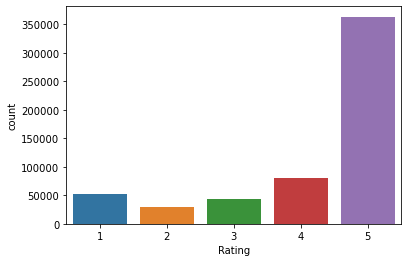

In [17]:
sns.countplot(df['Rating'])
#df['Rating'].value_counts()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

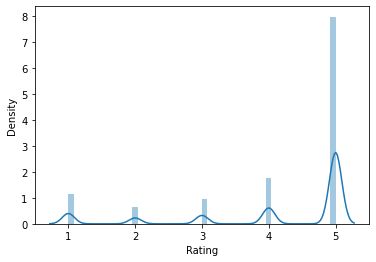

In [18]:
sns.distplot(temp_df['Rating'])


In [19]:
import warnings
warnings.filterwarnings("ignore")

# 2. Popular words in postive Reviews(4-5 Rating)

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt        

In [21]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

In [22]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('vader_lexicon')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
positive = temp_df.loc[temp_df['sentiment'] == 'positive']
postitive = positive[0:25000]

negative = temp_df.loc[temp_df['sentiment'] == 'negative']
negative = negative[0:25000]

In [25]:
#remove the stopwords
stop = stopwords.words('english')
temp_df['Review_Text'] = temp_df['Review_Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
temp_df.Review_Text.head()

0    Product arrived labeled Jumbo Salted Peanuts.....
1    This confection around centuries. It light pil...
2    If looking secret ingredient Robitussin I beli...
3    Great taffy great price. There wide assortment...
4    I got wild hair taffy ordered five pound bag. ...
Name: Review_Text, dtype: object

In [26]:
reviews = temp_df
# Dropping null values
reviews.dropna(inplace=True)

In [27]:
score_1 = reviews[reviews['Rating'] == 1]
score_2 = reviews[reviews['Rating'] == 2]
score_3 = reviews[reviews['Rating'] == 3]
score_4 = reviews[reviews['Rating'] == 4]
score_5 = reviews[reviews['Rating'] == 5]

In [28]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

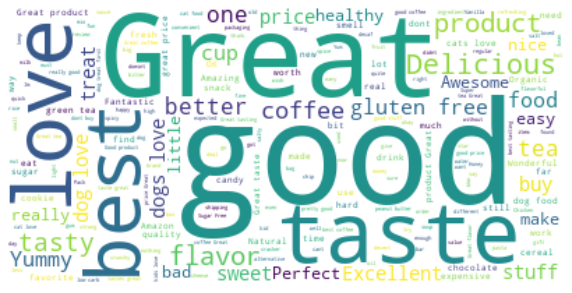

In [29]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Review_summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Rating'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Rating'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Review_summary.str.cat()
positive_reviews_str = positive_reviews.Review_summary.str.cat()

In [31]:
wordcloud_negative = WordCloud(background_color='black').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)

# Word cloud for positive Reviews

In [36]:
postitive.head()

,ProductId,UserId,Time,profile_Name,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Review_summary,Review_Text,Rating,sentiment,Usefulness
1,B000LQOCH0,ABXLMWJIXXAIN,05:30:00,"Natalia Corres ""Natalia Corres""",1.0,1.0,1.0,"""Delight"" says it all",This is a confection that has been around a fe...,4,positive,>75%
3,B006K2ZZ7K,A1UQRSCLF8GW1T,05:30:00,"Michael D. Bigham ""M. Wassir""",0.0,0.0,1.0,Great taffy,Great taffy at a great price. There was a wide...,5,positive,useless
4,B006K2ZZ7K,ADT0SRK1MGOEU,05:30:00,Twoapennything,0.0,0.0,1.0,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,positive,useless
5,B006K2ZZ7K,A1SP2KVKFXXRU1,05:30:00,David C. Sullivan,0.0,0.0,1.0,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,5,positive,useless
6,B006K2ZZ7K,A3JRGQVEQN31IQ,05:30:00,Pamela G. Williams,0.0,0.0,1.0,Wonderful tasty taffy,This taffy is so good. It is very soft and che...,5,positive,useless


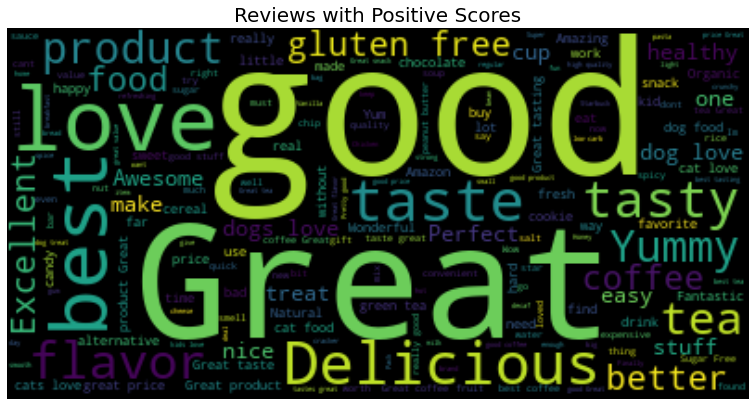

In [32]:
fig = plt.figure(figsize=(20,15))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

# 3.Popular words in Negative Reviwe(1-2)

In [37]:
negative.head()

,ProductId,UserId,Time,profile_Name,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Review_summary,Review_Text,Rating,sentiment,Usefulness
0,B00813GRG4,A1D87F6ZCVE5NK,05:30:00,dll pa,0.0,0.0,1.0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,negative,useless
2,B000UA0QIQ,A395BORC6FGVXV,05:30:00,Karl,3.0,3.0,1.0,Cough Medicine,If you are looking for the secret ingredient i...,2,negative,>75%
11,B0009XLVG0,A327PCT23YH90,05:30:00,LT,1.0,1.0,1.0,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,1,negative,>75%
15,B001GVISJM,A3KLWF6WQ5BNYO,05:30:00,Erica Neathery,0.0,0.0,1.0,poor taste,I love eating them and they are good for watch...,2,negative,useless
25,B001GVISJM,A3RXAU2N8KV45G,05:30:00,lady21,0.0,1.0,0.0,Nasty No flavor,The candy is just red No flavor . Just plan a...,1,negative,<25%


Text(0.5, 1.0, 'Reviews with Negative Scores')

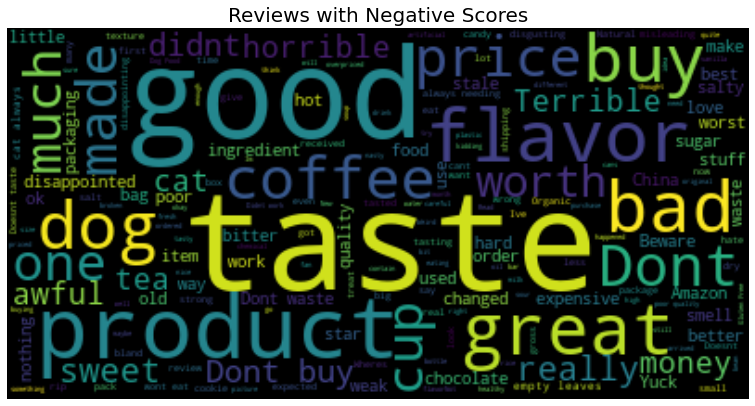

In [33]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

In [38]:
temp_df.head()

,ProductId,UserId,Time,profile_Name,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Review_summary,Review_Text,Rating,sentiment,Usefulness
0,B00813GRG4,A1D87F6ZCVE5NK,05:30:00,dll pa,0.0,0.0,1.0,Not as Advertised,Product arrived labeled Jumbo Salted Peanuts.....,1,negative,useless
1,B000LQOCH0,ABXLMWJIXXAIN,05:30:00,"Natalia Corres ""Natalia Corres""",1.0,1.0,1.0,"""Delight"" says it all",This confection around centuries. It light pil...,4,positive,>75%
2,B000UA0QIQ,A395BORC6FGVXV,05:30:00,Karl,3.0,3.0,1.0,Cough Medicine,If looking secret ingredient Robitussin I beli...,2,negative,>75%
3,B006K2ZZ7K,A1UQRSCLF8GW1T,05:30:00,"Michael D. Bigham ""M. Wassir""",0.0,0.0,1.0,Great taffy,Great taffy great price. There wide assortment...,5,positive,useless
4,B006K2ZZ7K,ADT0SRK1MGOEU,05:30:00,Twoapennything,0.0,0.0,1.0,Nice Taffy,I got wild hair taffy ordered five pound bag. ...,4,positive,useless


# 4.Distribution of Helpfulness

In [39]:
temp_df['Helpfulness'].describe()

count    568410.000000
mean          0.882960
std           0.274478
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: Helpfulness, dtype: float64

<AxesSubplot:xlabel='Helpfulness', ylabel='Density'>

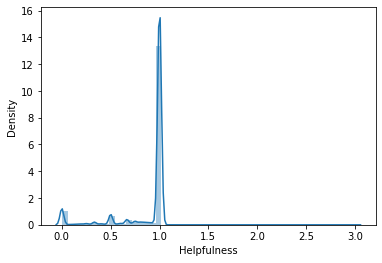

In [40]:
sns.distplot(temp_df['Helpfulness'])

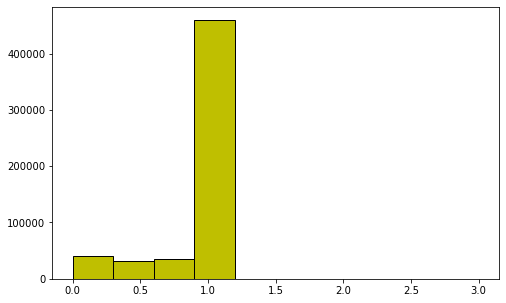

In [41]:
plt.figure(figsize=(8,5))
plt.hist(temp_df['Helpfulness'],color='y',edgecolor='k');

<AxesSubplot:xlabel='Helpfulness'>

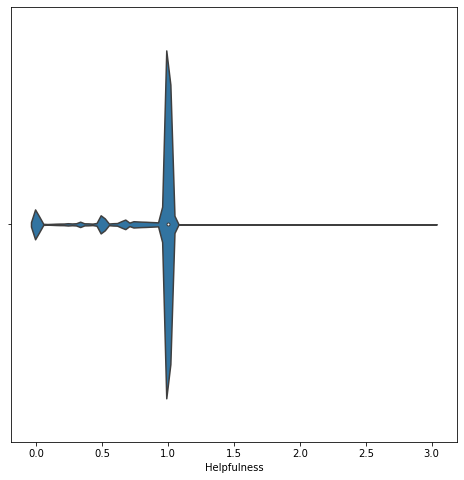

In [43]:
plt.figure(figsize=(8,8))
sns.violinplot(temp_df['Helpfulness'])

# 5.How dose rating affect Helpfulness

<AxesSubplot:xlabel='Rating', ylabel='Helpfulness'>

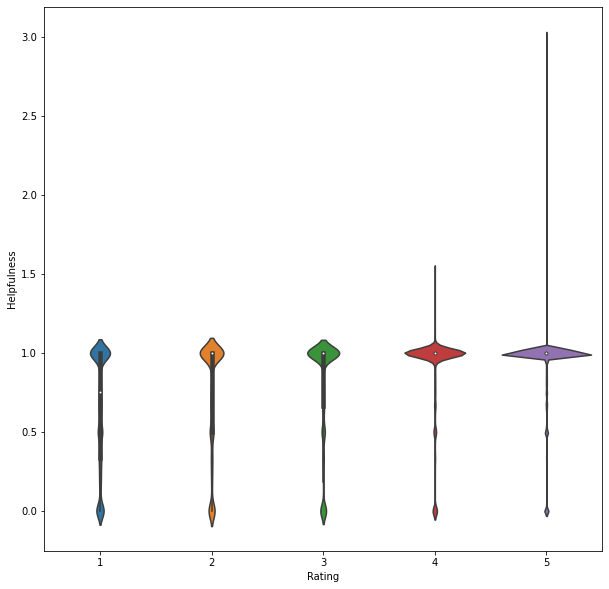

In [44]:
plt.figure(figsize=(10,10))
sns.violinplot(temp_df['Rating'],temp_df['Helpfulness'])

<AxesSubplot:xlabel='Rating', ylabel='Helpfulness'>

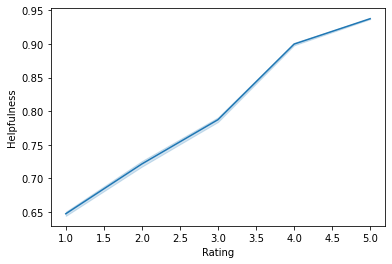

In [45]:
sns.lineplot(x=temp_df['Rating'],y=temp_df['Helpfulness'],data=df)


# 6.How dose word count vary by rating

In [5]:
temp_df["text_word_count"] = temp_df["Review_Text"].apply(lambda text: len(text.split()))

In [6]:
temp_df.head()

,ProductId,UserId,Time,profile_Name,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Review_summary,Review_Text,Rating,text_word_count
0,B00813GRG4,A1D87F6ZCVE5NK,05:30:00,dll pa,0.0,0.0,1.0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,31
1,B000LQOCH0,ABXLMWJIXXAIN,05:30:00,"Natalia Corres ""Natalia Corres""",1.0,1.0,1.0,"""Delight"" says it all",This is a confection that has been around a fe...,4,94
2,B000UA0QIQ,A395BORC6FGVXV,05:30:00,Karl,3.0,3.0,1.0,Cough Medicine,If you are looking for the secret ingredient i...,2,41
3,B006K2ZZ7K,A1UQRSCLF8GW1T,05:30:00,"Michael D. Bigham ""M. Wassir""",0.0,0.0,1.0,Great taffy,Great taffy at a great price. There was a wide...,5,27
4,B006K2ZZ7K,ADT0SRK1MGOEU,05:30:00,Twoapennything,0.0,0.0,1.0,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,72


In [7]:
temp_df[temp_df.Rating==5].text_word_count.median()

52.0

In [8]:
temp_df[temp_df.Rating==4].text_word_count.median()

65.0

In [9]:
temp_df[temp_df.Rating==3].text_word_count.median()

70.0

In [10]:
temp_df[temp_df.Rating==2].text_word_count.median()

67.0

In [11]:
temp_df[temp_df.Rating==1].text_word_count.median()

62.0

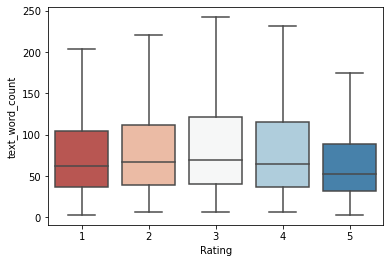

In [12]:
sns.boxplot(x='Rating',y='text_word_count', data=temp_df, palette='RdBu', showfliers=False)
plt.show()

# Exploratory Data Analysis

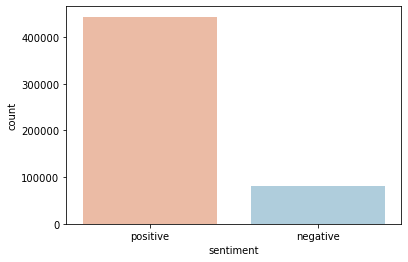

In [17]:
sns.countplot(x='sentiment', order=["positive", "negative"], data=temp_df, palette='RdBu')
plt.xlabel('sentiment')
plt.show()

In [18]:
temp_df.sentiment.value_counts()

positive    443776
negative     82037
not          42640
Name: sentiment, dtype: int64

# How many reviews are helpful?

In [19]:
temp_df.Usefulness.value_counts()

useless    270052
>75%       202835
25-75%      57286
<25%        38280
Name: Usefulness, dtype: int64

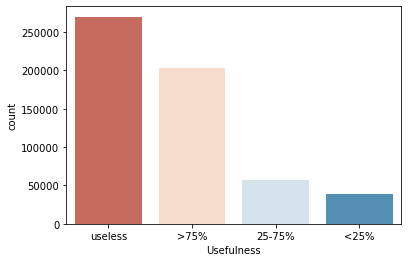

In [20]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=temp_df, palette='RdBu')
plt.xlabel('Usefulness')
plt.show()

# Positive reviews are found more helpful

In [22]:
temp_df[temp_df.Rating==5].Usefulness.value_counts()

useless    186743
>75%       142953
25-75%      21314
<25%        12111
Name: Usefulness, dtype: int64

In [23]:
temp_df[temp_df.Rating==2].Usefulness.value_counts()

useless    10604
>75%        7423
25-75%      6693
<25%        5049
Name: Usefulness, dtype: int64

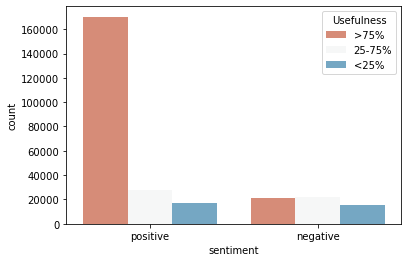

In [24]:
sns.countplot(x='sentiment', hue='Usefulness', order=["positive", "negative"], \
              hue_order=['>75%', '25-75%', '<25%'], data=temp_df, palette='RdBu')
plt.xlabel('sentiment')
plt.show()


In [8]:
dataset = pd.DataFrame(df)

In [10]:
dataset.to_csv('Amazon_Review.csv')